In [1]:
%%capture
!pip install dlt
!pip install sqlalchemy pymysql

# Task 1:
Rewrite your SpaceX pipeline from Part 1 using [RestAPI Client](https://dlthub.com/docs/general-usage/http/rest-client) or [rest_api_source](https://dlthub.com/docs/dlt-ecosystem/verified-sources/rest_api).

SpaceX API URL: https://api.spacexdata.com

Docs: https://github.com/r-spacex/SpaceX-API/blob/master/docs/README.md

Endpoints for loading:
- launches
- rockets
- crew

+ `@dlt.transformer` with **launches** payloads.

**Note**: Incremental loading is not neccessary for this tasks, you can skip it.

In [6]:
import time
import dlt
from dlt.sources.helpers.rest_client import RESTClient

# Initialize RESTClient
api_client = RESTClient(base_url="https://api.spacexdata.com/v4/")


@dlt.resource(table_name="launches")
def get_launches():
    response = api_client.get("launches")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="rockets")
def get_rockets():
    response = api_client.get("rockets")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="crew")
def get_crew():
    response = api_client.get("crew")
    response.raise_for_status()
    yield response.json()

# Transformer resource for additional processing of launches data
@dlt.transformer(data_from=get_launches, table_name="launches_transformed")
def transform_launches(launches):
    for launch in launches:
        yield {
            "id": launch["id"],
            "name": launch["name"],
            "date_utc": launch["date_utc"],
            "rocket": launch["rocket"]
        }

pipeline = dlt.pipeline(
    pipeline_name='spacex_pipeline',
    destination='duckdb',
    dataset_name='spacex_data',
    dev_mode=True,
)

start_time = time.time()

# Run the pipeline with the defined resources and transformer
load_info = pipeline.run([get_launches(), get_rockets(), get_crew(), transform_launches()])

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken to execute pipeline: {elapsed_time} seconds")
print(load_info)
print(pipeline.last_trace.last_normalize_info)


Time taken to execute pipeline: 4.9955127239227295 seconds
Pipeline spacex_pipeline load step completed in 1.53 seconds
1 load package(s) were loaded to destination duckdb and into dataset spacex_data_20240909030347
The duckdb destination used duckdb:////content/spacex_pipeline.duckdb location to store data
Load package 1725851027.1549544 is LOADED and contains no failed jobs
Normalized data for the following tables:
- _dlt_pipeline_state: 1 row(s)
- crew: 30 row(s)
- crew__launches: 30 row(s)
- launches: 205 row(s)
- launches__failures: 5 row(s)
- launches__payloads: 222 row(s)
- launches__cores: 215 row(s)
- launches__ships: 342 row(s)
- launches__capsules: 35 row(s)
- launches__links__flickr__original: 848 row(s)
- launches__fairings__ships: 75 row(s)
- launches__crew: 30 row(s)
- launches_transformed: 205 row(s)
- rockets: 4 row(s)
- rockets__payload_weights: 11 row(s)
- rockets__flickr_images: 16 row(s)

Load package 1725851027.1549544 is NORMALIZED and NOT YET LOADED to the desti

# Task 2:

1. Run the pipeline with the next configuration:
     ```
     os.environ['DATA_WRITER__BUFFER_MAX_ITEMS'] = '1'
     os.environ['EXTRACT__WORKERS'] = '1'
     os.environ['NORMALIZE__WORKERS'] = '1'
     os.environ['LOAD__WORKERS'] = '1'
     ```
2. Speed up the pipeline.
3. Create a chart that illustrates the dynamics of performance from configurations.
4. Figure out the optimal characteristics for the best performance.

## Run this cell before start the task
With this configuration we simulate the worst case scenario.

In [7]:
import os

# Set the buffer size to 1
os.environ['DATA_WRITER__BUFFER_MAX_ITEMS'] = '1'
os.environ['EXTRACT__WORKERS'] = '1'
os.environ['NORMALIZE__WORKERS'] = '1'
os.environ['LOAD__WORKERS'] = '1'

## Run the pipeline

In [14]:
import time
import dlt
from dlt.sources.helpers.rest_client import RESTClient

# Initialize RESTClient
api_client = RESTClient(base_url="https://api.spacexdata.com/v4/")

# Define API sources using RESTClient
@dlt.resource(table_name="launches")
def get_launches():
    response = api_client.get("launches")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="rockets")
def get_rockets():
    response = api_client.get("rockets")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="crew")
def get_crew():
    response = api_client.get("crew")
    response.raise_for_status()
    yield response.json()

# Transformer resource for additional processing of launches data
@dlt.transformer(data_from=get_launches, table_name="launches_transformed")
def transform_launches(launches):
    for launch in launches:
        yield {
            "id": launch["id"],
            "name": launch["name"],
            "date_utc": launch["date_utc"],
            "rocket": launch["rocket"]
        }

pipeline = dlt.pipeline(
    pipeline_name='spacex_pipeline',
    destination='duckdb',
    dataset_name='spacex_data',
    dev_mode=True,
)

# Set the environment variables to simulate the worst-case scenario
import os

os.environ['DATA_WRITER__BUFFER_MAX_ITEMS'] = '1'
os.environ['EXTRACT__WORKERS'] = '1'
os.environ['NORMALIZE__WORKERS'] = '1'
os.environ['LOAD__WORKERS'] = '1'

start_time = time.time()

# Run the pipeline with the defined sources and transformer
load_info = pipeline.run([get_launches(), get_rockets(), get_crew(), transform_launches()])

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken to execute pipeline: {elapsed_time} seconds")
print(load_info)
print(pipeline.last_trace.last_normalize_info)


Time taken to execute pipeline: 29.91794180870056 seconds
Pipeline spacex_pipeline load step completed in 28.24 seconds
1 load package(s) were loaded to destination duckdb and into dataset spacex_data_20240909040219
The duckdb destination used duckdb:////content/spacex_pipeline.duckdb location to store data
Load package 1725854539.441184 is LOADED and contains no failed jobs
Normalized data for the following tables:
- _dlt_pipeline_state: 1 row(s)
- crew: 30 row(s)
- crew__launches: 30 row(s)
- launches: 205 row(s)
- launches__failures: 5 row(s)
- launches__payloads: 222 row(s)
- launches__cores: 215 row(s)
- launches__ships: 342 row(s)
- launches__capsules: 35 row(s)
- launches__links__flickr__original: 848 row(s)
- launches__fairings__ships: 75 row(s)
- launches__crew: 30 row(s)
- launches_transformed: 205 row(s)
- rockets: 4 row(s)
- rockets__payload_weights: 11 row(s)
- rockets__flickr_images: 16 row(s)

Load package 1725854539.441184 is NORMALIZED and NOT YET LOADED to the destina

Running with buffer basic configuration

In [19]:
import time
import dlt
from dlt.sources.helpers.rest_client import RESTClient
import os

os.environ['DATA_WRITER__BUFFER_MAX_ITEMS'] = '1'

# Initialize RESTClient
api_client = RESTClient(base_url="https://api.spacexdata.com/v4/")

# Define API sources using RESTClient
@dlt.resource(table_name="launches")
def get_launches():
    response = api_client.get("launches")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="rockets")
def get_rockets():
    response = api_client.get("rockets")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="crew")
def get_crew():
    response = api_client.get("crew")
    response.raise_for_status()
    yield response.json()

# Transformer resource for additional processing of launches data
@dlt.transformer(data_from=get_launches, table_name="launches_transformed")
def transform_launches(launches):
    for launch in launches:
        yield {
            "id": launch["id"],
            "name": launch["name"],
            "date_utc": launch["date_utc"],
            "rocket": launch["rocket"]
        }

pipeline = dlt.pipeline(
    pipeline_name='spacex_pipeline',
    destination='duckdb',
    dataset_name='spacex_data',
    dev_mode=True,
)


start_time = time.time()

# Run the pipeline with the defined sources and transformer
load_info = pipeline.extract([get_launches(), get_rockets(), get_crew(), transform_launches()])

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken to execute pipeline: {elapsed_time} seconds")
print(load_info)
print(pipeline.last_trace.last_normalize_info)


Time taken to execute pipeline: 0.9548952579498291 seconds

Load package 1725855956.49202 is EXTRACTED and NOT YET LOADED to the destination and contains no failed jobs
None


Running extract workers basic configuration

In [20]:
import time
import dlt
from dlt.sources.helpers.rest_client import RESTClient
import os

os.environ['EXTRACT__WORKERS'] = '1'

# Initialize RESTClient
api_client = RESTClient(base_url="https://api.spacexdata.com/v4/")

# Define API sources using RESTClient
@dlt.resource(table_name="launches")
def get_launches():
    response = api_client.get("launches")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="rockets")
def get_rockets():
    response = api_client.get("rockets")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="crew")
def get_crew():
    response = api_client.get("crew")
    response.raise_for_status()
    yield response.json()

# Transformer resource for additional processing of launches data
@dlt.transformer(data_from=get_launches, table_name="launches_transformed")
def transform_launches(launches):
    for launch in launches:
        yield {
            "id": launch["id"],
            "name": launch["name"],
            "date_utc": launch["date_utc"],
            "rocket": launch["rocket"]
        }

pipeline = dlt.pipeline(
    pipeline_name='spacex_pipeline',
    destination='duckdb',
    dataset_name='spacex_data',
    dev_mode=True,
)


start_time = time.time()

# Run the pipeline with the defined sources and transformer
load_info = pipeline.extract([get_launches(), get_rockets(), get_crew(), transform_launches()])

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken to execute pipeline: {elapsed_time} seconds")
print(load_info)
print(pipeline.last_trace.last_normalize_info)


Time taken to execute pipeline: 1.2393274307250977 seconds

Load package 1725856017.2490547 is EXTRACTED and NOT YET LOADED to the destination and contains no failed jobs
None


Running normalize worker basic configuration

In [21]:
import time
import dlt
from dlt.sources.helpers.rest_client import RESTClient
import os

os.environ['NORMALIZE__WORKERS'] = '1'

# Initialize RESTClient
api_client = RESTClient(base_url="https://api.spacexdata.com/v4/")

# Define API sources using RESTClient
@dlt.resource(table_name="launches")
def get_launches():
    response = api_client.get("launches")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="rockets")
def get_rockets():
    response = api_client.get("rockets")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="crew")
def get_crew():
    response = api_client.get("crew")
    response.raise_for_status()
    yield response.json()

# Transformer resource for additional processing of launches data
@dlt.transformer(data_from=get_launches, table_name="launches_transformed")
def transform_launches(launches):
    for launch in launches:
        yield {
            "id": launch["id"],
            "name": launch["name"],
            "date_utc": launch["date_utc"],
            "rocket": launch["rocket"]
        }

pipeline = dlt.pipeline(
    pipeline_name='spacex_pipeline',
    destination='duckdb',
    dataset_name='spacex_data',
    dev_mode=True,
)


start_time = time.time()

# Run the pipeline with the defined sources and transformer
load_info = pipeline.normalize([get_launches(), get_rockets(), get_crew(), transform_launches()])

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken to execute pipeline: {elapsed_time} seconds")
print(load_info)
print(pipeline.last_trace.last_normalize_info)


Time taken to execute pipeline: 0.005879878997802734 seconds
None
None


Running load worker basic configuration

In [23]:
import time
import dlt
from dlt.sources.helpers.rest_client import RESTClient
import os

os.environ['LOAD__WORKERS'] = '1'

# Initialize RESTClient
api_client = RESTClient(base_url="https://api.spacexdata.com/v4/")

# Define API sources using RESTClient
@dlt.resource(table_name="launches")
def get_launches():
    response = api_client.get("launches")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="rockets")
def get_rockets():
    response = api_client.get("rockets")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="crew")
def get_crew():
    response = api_client.get("crew")
    response.raise_for_status()
    yield response.json()

# Transformer resource for additional processing of launches data
@dlt.transformer(data_from=get_launches, table_name="launches_transformed")
def transform_launches(launches):
    for launch in launches:
        yield {
            "id": launch["id"],
            "name": launch["name"],
            "date_utc": launch["date_utc"],
            "rocket": launch["rocket"]
        }

pipeline = dlt.pipeline(
    pipeline_name='spacex_pipeline',
    destination='duckdb',
    dataset_name='spacex_data',
    dev_mode=True,
)


start_time = time.time()

# Run the pipeline with the defined sources and transformer
load_info = pipeline.run([get_launches(), get_rockets(), get_crew(), transform_launches()])

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken to execute pipeline: {elapsed_time} seconds")
print(load_info)
print(pipeline.last_trace.last_normalize_info)


Time taken to execute pipeline: 9.315120220184326 seconds
Pipeline spacex_pipeline load step completed in 7.56 seconds
1 load package(s) were loaded to destination duckdb and into dataset spacex_data_20240909043611
The duckdb destination used duckdb:////content/spacex_pipeline.duckdb location to store data
Load package 1725856571.2241468 is LOADED and contains no failed jobs
Normalized data for the following tables:
- _dlt_pipeline_state: 1 row(s)
- crew: 30 row(s)
- crew__launches: 30 row(s)
- launches: 205 row(s)
- launches__failures: 5 row(s)
- launches__payloads: 222 row(s)
- launches__cores: 215 row(s)
- launches__ships: 342 row(s)
- launches__capsules: 35 row(s)
- launches__links__flickr__original: 848 row(s)
- launches__fairings__ships: 75 row(s)
- launches__crew: 30 row(s)
- launches_transformed: 205 row(s)
- rockets: 4 row(s)
- rockets__payload_weights: 11 row(s)
- rockets__flickr_images: 16 row(s)

Load package 1725856571.2241468 is NORMALIZED and NOT YET LOADED to the destin

See the difference in performance?
Try to find the best configuration for this pipeline. Use the graphs, they will help you.

In [15]:
%%capture
!pip install matplotlib

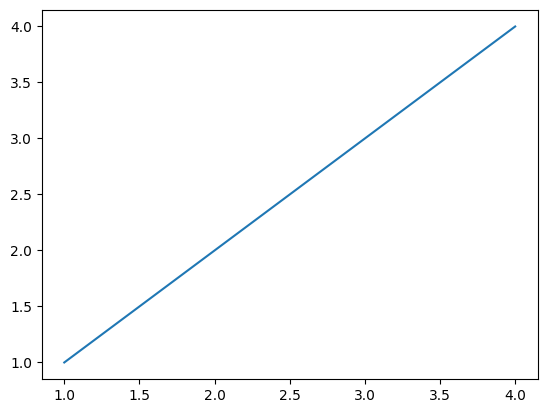

In [16]:
import matplotlib.pyplot as plt

worker_numbers = [1, 2, 3, 4]

seconds = [1, 2, 3, 4]

plt.plot(worker_numbers, seconds)
plt.show()

1. What was the optimal number of extract workers?

Extract Workers: 1, Time taken: 1.2070069313049316 seconds
Extract Workers: 2, Time taken: 0.6987593173980713 seconds
Extract Workers: 3, Time taken: 0.688901424407959 seconds
Extract Workers: 4, Time taken: 0.7347636222839355 seconds


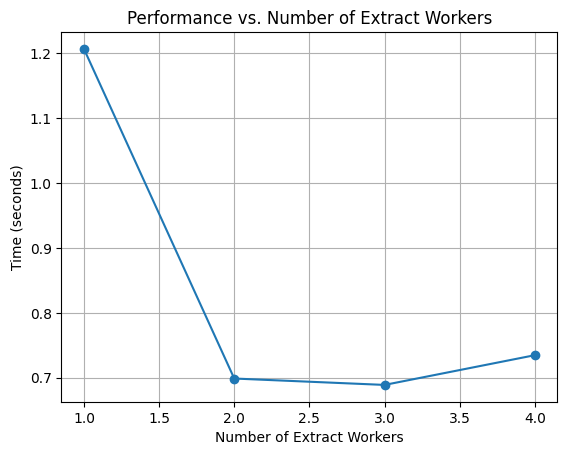

In [25]:
import time
import dlt
from dlt.sources.helpers.rest_client import RESTClient
import os
import matplotlib.pyplot as plt

# Initialize RESTClient
api_client = RESTClient(base_url="https://api.spacexdata.com/v4/")

# Define API sources using RESTClient
@dlt.resource(table_name="launches")
def get_launches():
    response = api_client.get("launches")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="rockets")
def get_rockets():
    response = api_client.get("rockets")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="crew")
def get_crew():
    response = api_client.get("crew")
    response.raise_for_status()
    yield response.json()

# Transformer resource for additional processing of launches data
@dlt.transformer(data_from=get_launches, table_name="launches_transformed")
def transform_launches(launches):
    for launch in launches:
        yield {
            "id": launch["id"],
            "name": launch["name"],
            "date_utc": launch["date_utc"],
            "rocket": launch["rocket"]
        }

def run_pipeline_with_workers(extract_workers):
    # Set environment variables
    os.environ['EXTRACT__WORKERS'] = str(extract_workers)

    pipeline = dlt.pipeline(
        pipeline_name='spacex_pipeline',
        destination='duckdb',
        dataset_name='spacex_data',
        dev_mode=True,
    )

    start_time = time.time()


    load_info = pipeline.extract([get_launches(), get_rockets(), get_crew(), transform_launches()])

    end_time = time.time()
    elapsed_time = end_time - start_time

    return elapsed_time

# Test different numbers of extract workers
worker_numbers = [1, 2, 3, 4]
elapsed_times = []

for num_workers in worker_numbers:
    elapsed_time = run_pipeline_with_workers(num_workers)
    elapsed_times.append(elapsed_time)
    print(f"Extract Workers: {num_workers}, Time taken: {elapsed_time} seconds")

# Plot the results
plt.plot(worker_numbers, elapsed_times, marker='o')
plt.xlabel('Number of Extract Workers')
plt.ylabel('Time (seconds)')
plt.title('Performance vs. Number of Extract Workers')
plt.grid(True)
plt.show()


2. What was the optimal number of normalize workers?

Normalize Workers: 1, Time taken: 0.007106304168701172 seconds
Normalize Workers: 2, Time taken: 0.003591299057006836 seconds
Normalize Workers: 3, Time taken: 0.003515958786010742 seconds
Normalize Workers: 4, Time taken: 0.004561901092529297 seconds


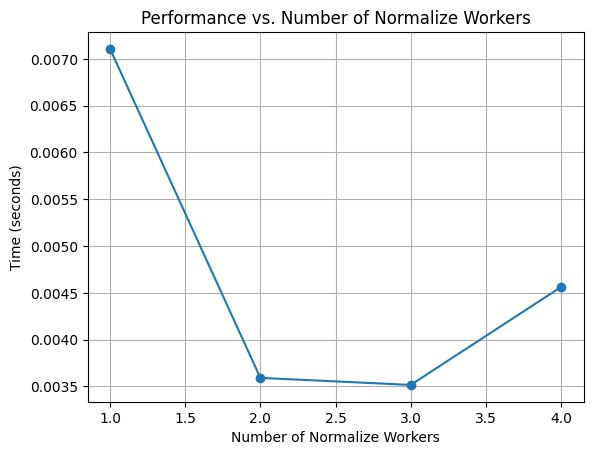

In [26]:
import time
import dlt
from dlt.sources.helpers.rest_client import RESTClient
import os
import matplotlib.pyplot as plt

# Initialize RESTClient
api_client = RESTClient(base_url="https://api.spacexdata.com/v4/")

# Define API resources using RESTClient
@dlt.resource(table_name="launches")
def get_launches():
    response = api_client.get("launches")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="rockets")
def get_rockets():
    response = api_client.get("rockets")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="crew")
def get_crew():
    response = api_client.get("crew")
    response.raise_for_status()
    yield response.json()


# Transformer resource for additional processing of launches data
@dlt.transformer(data_from=get_launches, table_name="launches_transformed")
def transform_launches(launches):
    for launch in launches:
        yield {
            "id": launch["id"],
            "name": launch["name"],
            "date_utc": launch["date_utc"],
            "rocket": launch["rocket"]
        }

def run_pipeline_with_normalize_workers(normalize_workers):
    # Set environment variables
    os.environ['NORMALIZE__WORKERS'] = str(normalize_workers)

    pipeline = dlt.pipeline(
        pipeline_name='spacex_pipeline',
        destination='duckdb',
        dataset_name='spacex_data',
        dev_mode=True,
    )

    start_time = time.time()

    # Run the pipeline with the defined resources
    load_info = pipeline.normalize([get_launches(), get_rockets(), get_crew(), transform_launches()])

    end_time = time.time()
    elapsed_time = end_time - start_time

    return elapsed_time

# Test different numbers of normalize workers
normalize_worker_numbers = [1, 2, 3, 4]
elapsed_times = []

for num_workers in normalize_worker_numbers:
    elapsed_time = run_pipeline_with_normalize_workers(num_workers)
    elapsed_times.append(elapsed_time)
    print(f"Normalize Workers: {num_workers}, Time taken: {elapsed_time} seconds")

# Plot the results
plt.plot(normalize_worker_numbers, elapsed_times, marker='o')
plt.xlabel('Number of Normalize Workers')
plt.ylabel('Time (seconds)')
plt.title('Performance vs. Number of Normalize Workers')
plt.grid(True)
plt.show()


3. What was the optimal number of load workers?

Load Workers: 1, Time taken: 10.748462677001953 seconds
Load Workers: 2, Time taken: 6.480939626693726 seconds
Load Workers: 3, Time taken: 6.047376394271851 seconds
Load Workers: 4, Time taken: 4.370703220367432 seconds


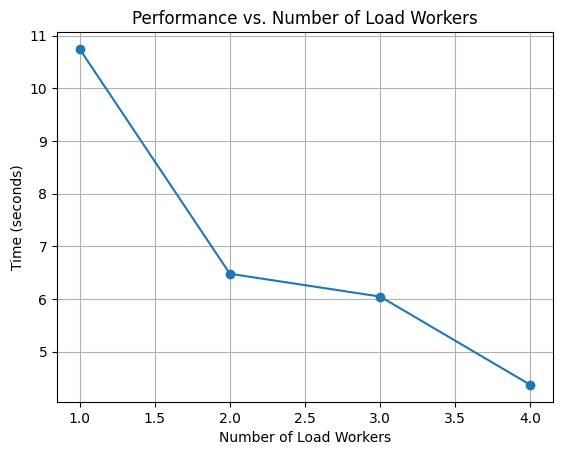

In [27]:
import time
import dlt
from dlt.sources.helpers.rest_client import RESTClient
import os
import matplotlib.pyplot as plt

# Initialize RESTClient
api_client = RESTClient(base_url="https://api.spacexdata.com/v4/")

# Define API resources using RESTClient
@dlt.resource(table_name="launches")
def get_launches():
    response = api_client.get("launches")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="rockets")
def get_rockets():
    response = api_client.get("rockets")
    response.raise_for_status()
    yield response.json()

@dlt.resource(table_name="crew")
def get_crew():
    response = api_client.get("crew")
    response.raise_for_status()
    yield response.json()

# Transformer resource for additional processing of launches data
@dlt.transformer(data_from=get_launches, table_name="launches_transformed")
def transform_launches(launches):
    for launch in launches:
        yield {
            "id": launch["id"],
            "name": launch["name"],
            "date_utc": launch["date_utc"],
            "rocket": launch["rocket"]
        }

def run_pipeline_with_load_workers(load_workers):
    # Set environment variables
    os.environ['LOAD__WORKERS'] = str(load_workers)

    pipeline = dlt.pipeline(
        pipeline_name='spacex_pipeline',
        destination='duckdb',
        dataset_name='spacex_data',
        dev_mode=True,
    )

    start_time = time.time()

    # Run the pipeline with the defined resources
    load_info = pipeline.run([get_launches(), get_rockets(), get_crew(), transform_launches()])

    end_time = time.time()
    elapsed_time = end_time - start_time

    return elapsed_time

# Test different numbers of load workers
load_worker_numbers = [1, 2, 3, 4]
elapsed_times = []

for num_workers in load_worker_numbers:
    elapsed_time = run_pipeline_with_load_workers(num_workers)
    elapsed_times.append(elapsed_time)
    print(f"Load Workers: {num_workers}, Time taken: {elapsed_time} seconds")

# Plot the results
plt.plot(load_worker_numbers, elapsed_times, marker='o')
plt.xlabel('Number of Load Workers')
plt.ylabel('Time (seconds)')
plt.title('Performance vs. Number of Load Workers')
plt.grid(True)
plt.show()
